In [1]:
import numpy as np
import os, glob
import gdal, osr # python2.7
# import MisrToolkit as Mtk # python2.7
# from MisrToolkit import * # 
# from subprocess import call
# import datetime as dt
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [2]:
geotif_path = '/Volumes/Ehsanm_DRI/research/MISR/roughness_files/roughArrays_40_173_174_175_smaller_set/roughArrays_40_173_174_175_smaller_set_reproPolar_test2_float64/merging/reprojPolar'
# geotif_file = 'projected_path_173_block_11_28GCPs_noGdalRes_dTypeFloat64_reprojToEPSG_3995.tif'
# geotif_file = 'merged_paths_173_reprojPolar_AntiMerCrossing_Float64.tif'
geotif_file = 'merged_paths_173_174_175_40_reprojPolar_MeridianCrossing_Float64.tif'



geotif_file_fullpath = os.path.join(geotif_path, geotif_file)

In [3]:
print(geotif_file_fullpath)

#~ check if ratster exist
if (os.path.isfile(geotif_file_fullpath)):
    print('-> input raster exists!')
else:
    print('-> raster NOT exist!')

/Volumes/Ehsanm_DRI/research/MISR/roughness_files/roughArrays_40_173_174_175_smaller_set/roughArrays_40_173_174_175_smaller_set_reproPolar_test2_float64/merging/reprojPolar/merged_paths_173_174_175_40_reprojPolar_MeridianCrossing_Float64.tif
-> input raster exists!


In [4]:
#~ raster2array: read data from raster in to array
dataset = gdal.Open(geotif_file_fullpath)
print(type(dataset))

<class 'osgeo.gdal.Dataset'>


In [5]:
raster = dataset.GetRasterBand(1)
metadata = {}
print(type(metadata))

<type 'dict'>


In [6]:
metadata['array_rows'] = dataset.RasterYSize
metadata['array_cols'] = dataset.RasterXSize

print('rows: %s' % metadata['array_rows'])
print('columns: %s' % metadata['array_cols'])

rows: 15381
columns: 7772


In [7]:
geotransform = dataset.GetGeoTransform()
print(geotransform) # note: units in meters
print('order of geoTransform matrix= tlX, pixelW, 0, tlY, 0, pixelH')

(-674422.8959060248, 222.43814239233023, 0.0, 1748513.025259875, 0.0, -222.43814239233023)
order of geoTransform matrix= tlX, pixelW, 0, tlY, 0, pixelH


In [8]:
xMin = geotransform[0]
xMax = geotransform[0] + dataset.RasterXSize*geotransform[1] # i changed it to * to get xMax value
yMin = geotransform[3] + dataset.RasterYSize*geotransform[5]
yMax = geotransform[3]

In [9]:
print(xMin)
print(xMax)
print(yMin)
print(yMax)

-674422.895906
1054366.34677
-1672808.04288
1748513.02526


In [10]:
# metadata['extent'] = (xMin,xMax,yMin,yMax)
plot_extent = (xMin,xMax,yMin,yMax)

## get shape of roughness data

In [11]:
array_shape = raster.ReadAsArray(0,0,metadata['array_cols'],metadata['array_rows']).astype(np.double).shape # check this f(.)
print(array_shape)

(15381, 7772)


## build an array with zeros

In [12]:
array = np.zeros((array_shape[0], array_shape[1], dataset.RasterCount), dtype=np.double) # check f(.) arguments

In [13]:
print(array.min())
print(array.max())

0.0
0.0


## fill the array with red band data

In [14]:
array = dataset.GetRasterBand(1).ReadAsArray(0, 0, metadata['array_cols'], metadata['array_rows']).astype(np.double) # check in dtyp, how set to Byte??

In [15]:
print(type(array))
print('array min: %s' % array.min())
print('array max: %s' % array.max())

<type 'numpy.ndarray'>
array min: 0.0
array max: 255.00000000000003


## plot the array

In [16]:
cmap_title = 'roughness (cm)'
plot_title = 'roughness values'

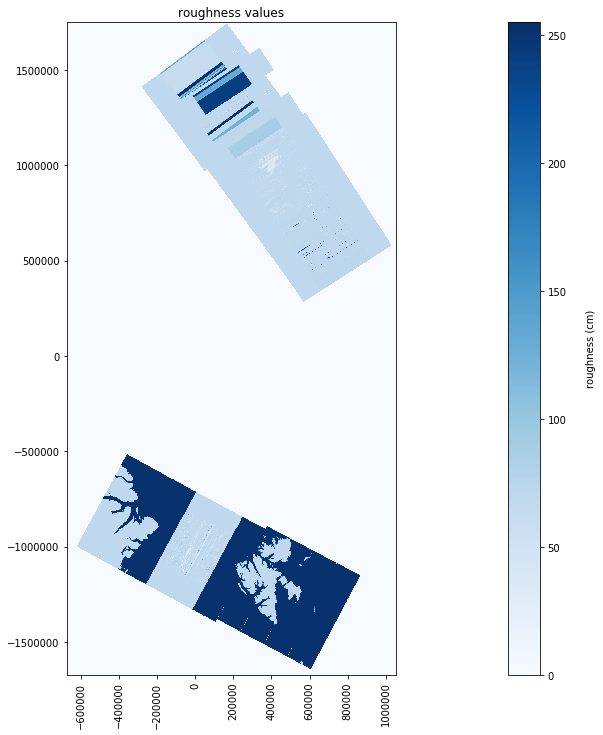

In [19]:
plt.figure(figsize = (40,12))

plot = plt.imshow(array, extent=plot_extent, vmin=array.min(), vmax=array.max(), interpolation='nearest')#, aspect='none')

# colormap = 'Greys'
# colormap = 'jet'
colormap = 'Blues'
plt.set_cmap(colormap)

cbar = plt.colorbar(plot,aspect=20)
cbar.set_label(cmap_title,rotation=90,labelpad=20)
plt.title(plot_title)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain')
rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90)